<h2 style="text-align:center">Predict the employee attrition rate in organizations</h2>

### Problem Statement 
---
Employees are the most important part of an organization. Successful employees meet deadlines, make sales, and build the brand through positive customer interactions.

Employee attrition is a major cost to an organization and predicting such attritions is the most important requirement of the Human Resources department in many organizations. In this problem, your task is to predict the attrition rate of employees of an organization

---



#### Importing libraries

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error

#### Dataset directory path

In [242]:
dataset_dir='data'

#### Load test and train data

In [243]:
train_data=pd.read_csv(os.path.join(dataset_dir,'Train.csv'))
test_data=pd.read_csv(os.path.join(dataset_dir,'Test.csv'))

#### Print first 5 rows of train data

In [244]:
train_data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


#### Print shape of train and test data

In [245]:
train_data.shape

(7000, 24)

In [246]:
test_data.shape

(3000, 23)

#### Check column names and their dtypes in train data

In [247]:
train_data.dtypes

Employee_ID                   object
Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
VAR1                           int64
VAR2                         float64
VAR3                         float64
VAR4                         float64
VAR5                           int64
VAR6                           int64
VAR7                           int64
Attrition_rate               float64
dtype: object

#### Check null values in train and test data

In [248]:
train_data.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [249]:
test_data.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

#### Handle missing values in train and test data
##### We will use imputation methods to handle null values in train and test data, but before that we need to see the distribution of features having null values

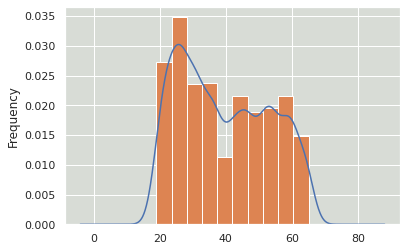

In [250]:
fig, ax = plt.subplots()
train_data['Age'].plot.kde(ax=ax, legend=False)
train_data['Age'].plot.hist(density=True, ax=ax)
ax.set_facecolor('#d8dcd6')

#### Histogram for Age doesn't follow any kind of normal, uniform or skewed distribution so we will use forward filling for imputing values

In [251]:
train_data['Age'].ffill(inplace=True)
test_data['Age'].ffill(inplace=True)

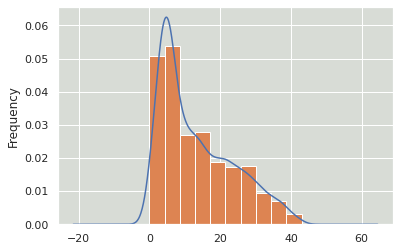

In [252]:
fig, ax = plt.subplots()
train_data['Time_of_service'].plot.kde(ax=ax, legend=False)
train_data['Time_of_service'].plot.hist(density=True, ax=ax)
ax.set_facecolor('#d8dcd6')

#### As graph for Time_of_service is skewed we will impute missing values with median

In [253]:
train_data['Time_of_service'].fillna(train_data['Time_of_service'].median(),inplace=True)
test_data['Time_of_service'].fillna(train_data['Time_of_service'].median(),inplace=True)

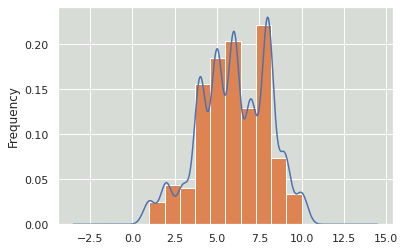

In [254]:
fig, ax = plt.subplots()
train_data['Pay_Scale'].plot.kde(ax=ax, legend=False)
train_data['Pay_Scale'].plot.hist(density=True, ax=ax)
ax.set_facecolor('#d8dcd6')

#### Histogram for Pay_Scale doesn't follow any kind of normal, uniform or skewed distribution so we will use forward filling for imputing values

In [255]:
train_data['Pay_Scale'].ffill(inplace=True)
test_data['Pay_Scale'].ffill(inplace=True)

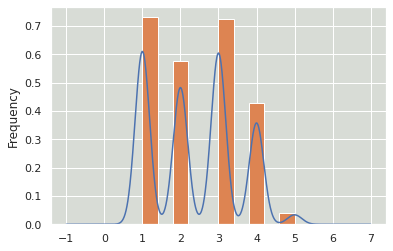

In [256]:
fig, ax = plt.subplots()
train_data['Work_Life_balance'].plot.kde(ax=ax, legend=False)
train_data['Work_Life_balance'].plot.hist(density=True, ax=ax)
ax.set_facecolor('#d8dcd6')

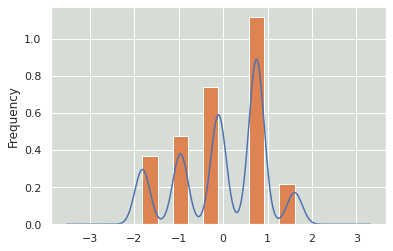

In [257]:
fig, ax = plt.subplots()
train_data['VAR2'].plot.kde(ax=ax, legend=False)
train_data['VAR2'].plot.hist(density=True, ax=ax)
ax.set_facecolor('#d8dcd6')

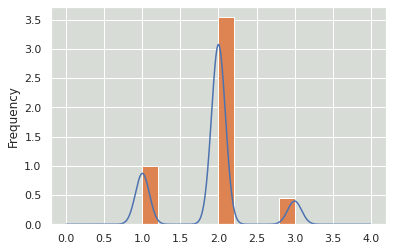

In [258]:
fig, ax = plt.subplots()
train_data['VAR4'].plot.kde(ax=ax, legend=False)
train_data['VAR4'].plot.hist(density=True, ax=ax)
ax.set_facecolor('#d8dcd6')

#### As you can see from above graphs, Work_Life_balance,VAR2,VAR4 are numerical columns but their values are discrete.Hence we can impute missing values with their mode.

In [259]:
train_data['Work_Life_balance'].fillna(train_data['Work_Life_balance'].mode()[0],inplace=True)
test_data['Work_Life_balance'].fillna(train_data['Work_Life_balance'].mode()[0],inplace=True)

In [260]:
train_data['VAR2'].fillna(train_data['VAR2'].mode()[0],inplace=True)
test_data['VAR2'].fillna(train_data['VAR2'].mode()[0],inplace=True)

In [261]:
train_data['VAR4'].fillna(train_data['VAR4'].mode()[0],inplace=True)
test_data['VAR4'].fillna(train_data['VAR4'].mode()[0],inplace=True)

In [262]:
train_data.isnull().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

In [263]:
test_data.isnull().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
dtype: int64

#### Now we will handle categorical columns , select those columns which have object dtype only

In [264]:
categorical_data=train_data.select_dtypes(include=['object'])

In [265]:
categorical_data.head()

,Employee_ID,Gender,Relationship_Status,Hometown,Unit,Decision_skill_possess,Compensation_and_Benefits
0,EID_23371,F,Married,Franklin,IT,Conceptual,type2
1,EID_18000,M,Single,Springfield,Logistics,Analytical,type2
2,EID_3891,F,Married,Clinton,Quality,Conceptual,type2
3,EID_17492,F,Single,Lebanon,Human Resource Management,Behavioral,type2
4,EID_22534,F,Married,Springfield,Logistics,Conceptual,type3


#### Plot graphs to see frequency distribution of columns

In [266]:
def frequency_distribution(value_count):
    sns.set(style="darkgrid")
    sns.barplot(value_count.index, value_count.values, alpha=0.9)
    plt.show()

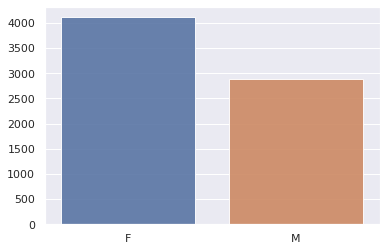

In [267]:
frequency_distribution(categorical_data['Gender'].value_counts())

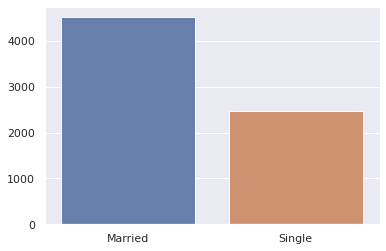

In [268]:
frequency_distribution(categorical_data['Relationship_Status'].value_counts())

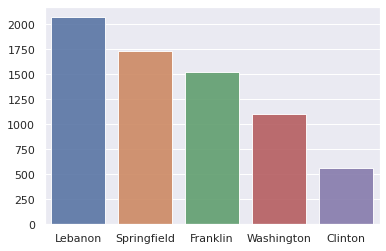

In [269]:
frequency_distribution(categorical_data['Hometown'].value_counts())

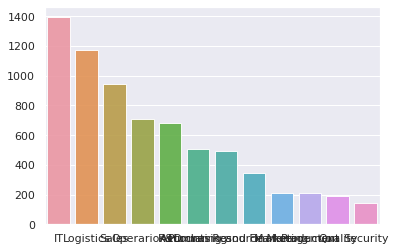

12


In [270]:
frequency_distribution(categorical_data['Unit'].value_counts())
print(categorical_data['Unit'].value_counts().count())

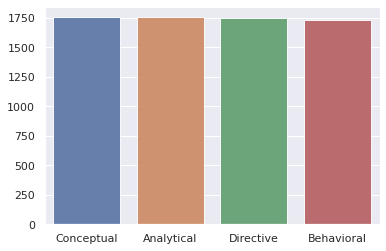

In [271]:
frequency_distribution(categorical_data['Decision_skill_possess'].value_counts())

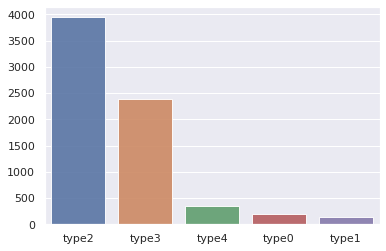

In [272]:
frequency_distribution(categorical_data['Compensation_and_Benefits'].value_counts())


#### As Gender and Relationshup_Status have only two categories, we will map them with 0 and 1.

In [273]:
train_data['Gender']=train_data['Gender'].apply(lambda x : 0 if x=='F' else 1)
test_data['Gender']=test_data['Gender'].apply(lambda x : 0 if x=='F' else 1)

In [274]:
train_data['Relationship_Status']=train_data['Relationship_Status'].apply(lambda x : 0 if x=='Married' else 1)
test_data['Relationship_Status']=test_data['Relationship_Status'].apply(lambda x : 0 if x=='Married' else 1)

#### Hometown and Decision_skill_possess  are nominal variables with 5  and 4 different values respectively so we will use one hot encoding.

In [275]:
one_hot_enc=OneHotEncoder(handle_unknown='ignore')
enc_data=one_hot_enc.fit_transform(categorical_data[['Hometown']]).toarray()
enc_hometown_train = pd.DataFrame(enc_data,columns=one_hot_enc.categories_[0])
train_data= train_data.join(enc_hometown_train)

In [276]:
enc_data=one_hot_enc.transform(test_data[['Hometown']]).toarray()
enc_hometown_test=pd.DataFrame(enc_data,columns=one_hot_enc.categories_[0])
test_data= test_data.join(enc_hometown_test)

In [277]:
enc_data=one_hot_enc.fit_transform(categorical_data[['Decision_skill_possess']]).toarray()
enc_dec_skill_train = pd.DataFrame(enc_data,columns=one_hot_enc.categories_[0])
train_data= train_data.join(enc_dec_skill_train)

In [278]:
enc_data=one_hot_enc.transform(test_data[['Decision_skill_possess']]).toarray()
enc_dec_skill_test=pd.DataFrame(enc_data,columns=one_hot_enc.categories_[0])
test_data= test_data.join(enc_dec_skill_test)

In [279]:
train_data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Attrition_rate,Clinton,Franklin,Lebanon,Springfield,Washington,Analytical,Behavioral,Conceptual,Directive
0,EID_23371,0,42.0,4,0,Franklin,IT,Conceptual,4.0,4,...,0.1841,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,EID_18000,1,24.0,3,1,Springfield,Logistics,Analytical,5.0,4,...,0.0670,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,EID_3891,0,58.0,3,0,Clinton,Quality,Conceptual,27.0,3,...,0.0851,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,EID_17492,0,26.0,3,1,Lebanon,Human Resource Management,Behavioral,4.0,3,...,0.0668,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,EID_22534,0,31.0,1,0,Springfield,Logistics,Conceptual,5.0,4,...,0.1827,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


#### Now we can drop Hometown and Decision_skill_possess columns from train and test data

In [280]:
train_data.drop(['Hometown','Decision_skill_possess'],axis=1,inplace=True)
test_data.drop(['Hometown','Decision_skill_possess'],axis=1,inplace=True)

#### Compensation_and_Benefits have some order so we will use label encdoing.

In [281]:
label_enc=LabelEncoder()
train_data['Compensation_and_Benefits']=label_enc.fit_transform(train_data['Compensation_and_Benefits'])

In [282]:
test_data['Compensation_and_Benefits']=label_enc.transform(test_data['Compensation_and_Benefits'])

#### Unit column has 12 different categories, we will use Binary Encoding

In [283]:
import category_encoders as ce
enc=ce.BinaryEncoder(cols=['Unit'])
enc_data=enc.fit_transform(train_data['Unit'])
train_data=pd.concat([train_data,enc_data],axis=1)

In [284]:
enc_data=enc.transform(test_data['Unit'])
test_data=pd.concat([test_data,enc_data],axis=1)

In [285]:
train_data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Unit,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,...,Washington,Analytical,Behavioral,Conceptual,Directive,Unit_0,Unit_1,Unit_2,Unit_3,Unit_4
0,EID_23371,0,42.0,4,0,IT,4.0,4,33,1,...,0.0,0.0,0.0,1.0,0.0,0,0,0,0,1
1,EID_18000,1,24.0,3,1,Logistics,5.0,4,36,0,...,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0
2,EID_3891,0,58.0,3,0,Quality,27.0,3,51,0,...,0.0,0.0,0.0,1.0,0.0,0,0,0,1,1
3,EID_17492,0,26.0,3,1,Human Resource Management,4.0,3,56,1,...,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0
4,EID_22534,0,31.0,1,0,Logistics,5.0,4,62,1,...,0.0,0.0,0.0,1.0,0.0,0,0,0,1,0


In [286]:
test_data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Unit,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,...,Washington,Analytical,Behavioral,Conceptual,Directive,Unit_0,Unit_1,Unit_2,Unit_3,Unit_4
0,EID_22713,0,32.0,5,1,R&D,7.0,4,30,1,...,0.0,0.0,0.0,1.0,0.0,0,1,0,1,1
1,EID_9658,1,65.0,2,1,IT,41.0,2,72,1,...,0.0,0.0,0.0,0.0,1.0,0,0,0,0,1
2,EID_22203,1,52.0,3,0,Sales,21.0,3,25,0,...,0.0,0.0,0.0,0.0,1.0,0,0,1,1,0
3,EID_7652,1,50.0,5,1,Marketing,11.0,4,28,1,...,1.0,1.0,0.0,0.0,0.0,0,1,0,1,0
4,EID_6516,0,44.0,3,0,R&D,12.0,4,47,1,...,0.0,0.0,0.0,1.0,0.0,0,1,0,1,1


#### As you can see Binary Encoder has made only 4 new columns out of 12 categories unlike One Hot Encoding which had made 12 new columns.

#### We can remove Unit from train and test data and we don't need Empolyee_ID also because each Employee_ID is unique and it won't be useful for the model.

In [287]:
train_data.drop(['Unit','Employee_ID'],axis=1,inplace=True)
test_data.drop(['Unit','Employee_ID'],axis=1,inplace=True)

In [288]:
train_data.shape

(7000, 34)

In [289]:
test_data.shape

(3000, 33)

#### Print description of data to check if data is on same scale or not.

In [290]:
train_data.describe()

,Gender,Age,Education_Level,Relationship_Status,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,...,Washington,Analytical,Behavioral,Conceptual,Directive,Unit_0,Unit_1,Unit_2,Unit_3,Unit_4
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,...,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.0,7000.000000,7000.000000,7000.000000,7000.000000
mean,0.412286,39.599286,3.187857,0.354286,13.315429,2.367143,47.064286,0.817857,2.798000,6.005714,...,0.158000,0.250714,0.248000,0.250857,0.250429,0.0,0.319714,0.306571,0.487429,0.496857
std,0.492281,13.611184,1.065102,0.478330,10.268266,1.149395,15.761406,0.648205,1.163721,2.058849,...,0.364767,0.433455,0.431883,0.433537,0.433291,0.0,0.466399,0.461103,0.499878,0.500026
min,0.000000,19.000000,1.000000,0.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,3.000000,0.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,37.000000,3.000000,0.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,1.000000,52.000000,4.000000,1.000000,20.000000,3.000000,61.000000,1.000000,3.000000,8.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000
max,1.000000,65.000000,5.000000,1.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


#### As you can see data is not on same scale so we will first scale the data using StandardScaler.
#### There is no need to scale target column so we will first drop it from train_data 

In [291]:
scaler=StandardScaler()
train_data_labels=train_data['Attrition_rate']
train_data=train_data.drop(['Attrition_rate'],axis=1)

In [292]:
train_df= scaler.fit_transform(train_data)
test_df = scaler.transform(test_data)

In [293]:
train_df = pd.DataFrame(train_df,columns=train_data.columns,index=train_data.index)
test_df = pd.DataFrame(test_df,columns=test_data.columns,index=test_data.index)

#### Let's make a baisc Linear Regression model to see how it performs.

In [294]:
train_X,test_X,train_y,test_y=train_test_split(train_df,train_data_labels,test_size=0.1)

In [295]:
lr=LinearRegression()

In [296]:
lr.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [297]:
predicted_test_X=lr.predict(test_X)

In [298]:
mean_squared_error(test_y,predicted_test_X)

0.0382880774343208

In [299]:
np.mean(cross_val_score(lr,train_df,target,scoring='neg_mean_squared_error',cv=10))

-0.03458177736452219

##### Ist submission

In [300]:
predictions=lr.predict(test_df)

In [301]:
Employee_ID=pd.read_csv(os.path.join(dataset_dir,'Test.csv'))['Employee_ID']

In [302]:
submissions=pd.DataFrame({'Employee_ID':Employee_ID,'Attrition_rate':predictions})

In [303]:
submissions.to_csv('submission_1.csv',index=False) ##score 81.18

#### Now lets try Xgboost Model

In [305]:
import xgboost as xgb

In [306]:
xgbRegressor=xgb.XGBRegressor()

In [307]:
xgbRegressor.fit(train_X,train_y)

/usr/local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:14:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [308]:
predicted_test_X=xgbRegressor.predict(test_X)

In [309]:
mean_squared_error(test_y,predicted_test_X)

0.038147477517154374

#### 2nd submission

In [310]:
predictions=lr.predict(test_df)

In [311]:
Employee_ID=pd.read_csv(os.path.join(dataset_dir,'Test.csv'))['Employee_ID']

In [312]:
submissions=pd.DataFrame({'Employee_ID':Employee_ID,'Attrition_rate':predictions})

In [314]:
submissions.to_csv('submission_2.csv',index=False) ##score 81.18674

#### As both of the models are giving about same score, let's find correlation between Target and other columns.

In [316]:
train_data.apply(lambda x: x.corr(train_data_labels))

Gender                       0.028544
Age                         -0.018856
Education_Level             -0.008143
Relationship_Status          0.009107
Time_of_service             -0.017203
Time_since_promotion         0.013880
growth_rate                  0.014247
Travel_Rate                 -0.012608
Post_Level                   0.016402
Pay_Scale                   -0.015183
Compensation_and_Benefits   -0.025175
Work_Life_balance            0.020975
VAR1                        -0.008073
VAR2                        -0.023392
VAR3                         0.001245
VAR4                        -0.013364
VAR5                        -0.004770
VAR6                        -0.003130
VAR7                        -0.015299
Clinton                     -0.001454
Franklin                    -0.004188
Lebanon                     -0.008222
Springfield                  0.014555
Washington                  -0.001122
Analytical                  -0.002822
Behavioral                  -0.027524
Conceptual  